In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Reloads custom packages after changes are made
%load_ext autoreload
%autoreload 2

## Synthetic Crystal Growth

In [3]:
from crystalgrowth_class import crystalgrowth

In [4]:
cg = crystalgrowth(random_seed=10)

### Choose number of nucleation sites

In [5]:
nuc_array = np.empty((128,128))
nuc_array[:] = np.nan
nuc_array, pos, orients = cg.nucleate(nuc_array,10)

In [6]:
nuc_list = cg.nucleate(nuc_array,10)

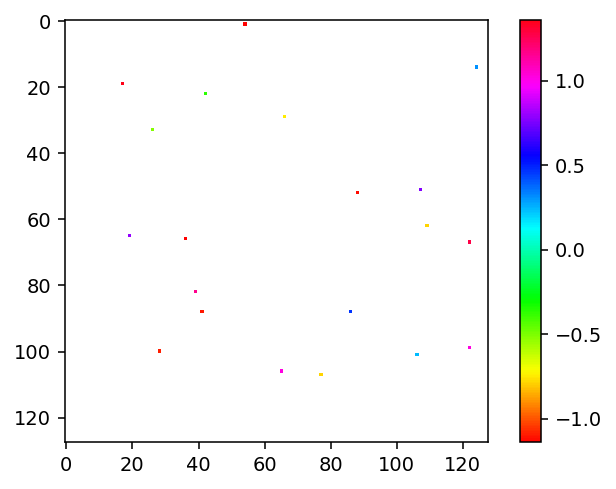

In [7]:
plt.figure(dpi=140)
plt.imshow(nuc_array,cmap='hsv')
plt.colorbar()

### Grow crystals from nucleation sites
* Choose growth anisotropy, and range of orientation mutations

In [8]:
grow_array = cg.grow_complete(nuc_array,growth_anisotropy=5,pi_mutate=np.deg2rad(0),c_mutate=np.deg2rad(0),do_periodic=True)

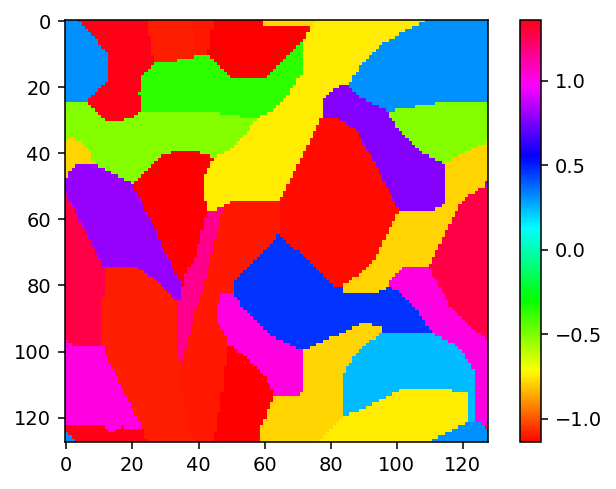

In [9]:
plt.figure(dpi=140)
plt.imshow(grow_array,cmap='hsv',interpolation='none')
plt.colorbar()

In [13]:
from skimage.segmentation import felzenszwalb, find_boundaries

In [11]:
segmented = felzenszwalb(grow_array)

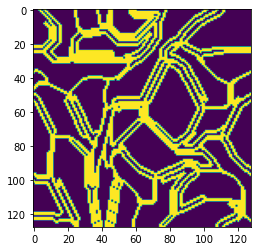

In [14]:
plt.imshow(find_boundaries(segmented))

In [70]:
grow_array = cg.grow_complete(nuc_array,growth_anisotropy=5,pi_mutate=np.deg2rad(5),c_mutate=np.deg2rad(5),do_periodic=False)

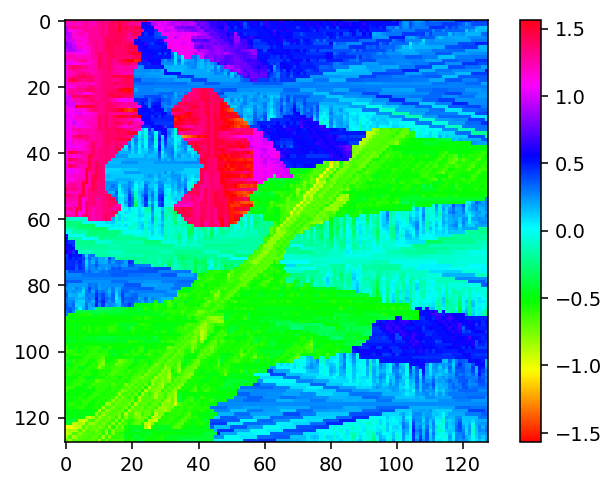

In [69]:
plt.figure(dpi=140)
plt.imshow(grow_array,cmap='hsv',interpolation='none')
plt.colorbar()

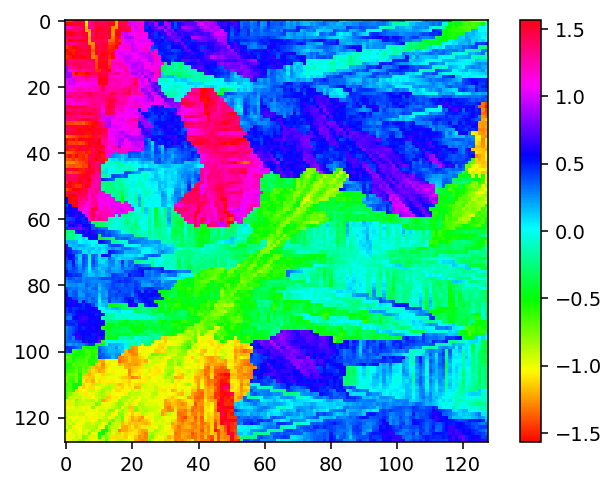

In [71]:
plt.figure(dpi=140)
plt.imshow(grow_array,cmap='hsv',interpolation='none')
plt.colorbar()

In [66]:
grown_partial = cg.grow_partial(nuc_array,5,do_periodic=True)

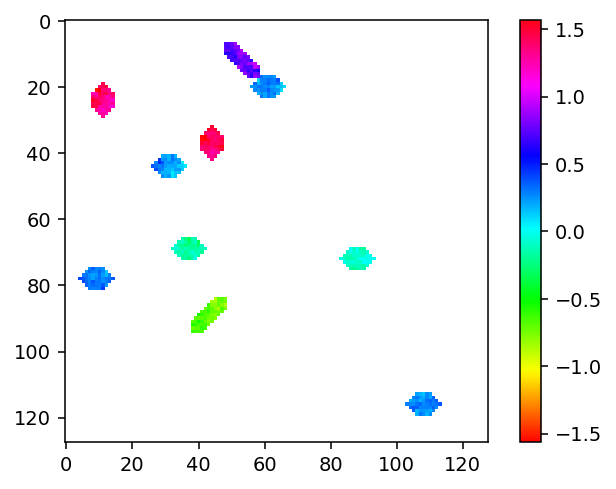

In [67]:
plt.figure(dpi=140)
plt.imshow(grown_partial,cmap='hsv',interpolation='none')
plt.colorbar()

In [41]:
s1_partial = np.zeros((128,128,3))
s1_partial[:,:,0] = np.cos(grown_partial)
s1_partial[:,:,1] = np.sin(grown_partial)

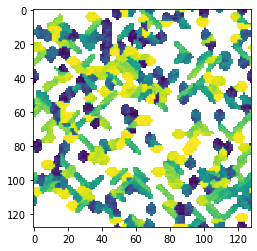

In [42]:
plt.imshow(s1_partial[:,:,0])

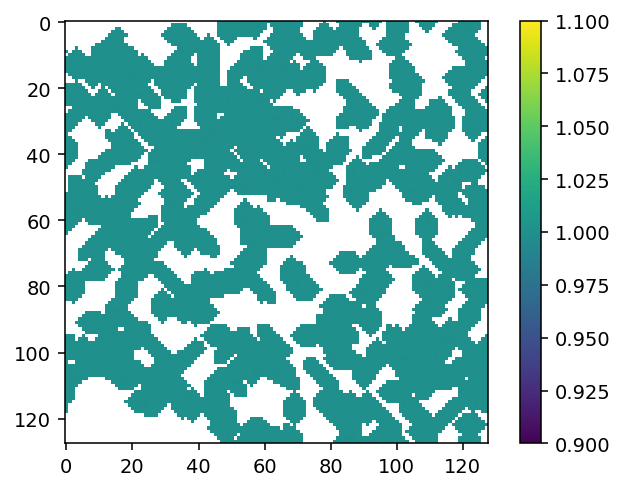

In [47]:
s1_mag = np.sqrt(np.sum(s1_partial**2,axis=2))
plt.figure(dpi=140)
plt.imshow(s1_mag,interpolation='none')
plt.colorbar()

In [52]:
s1_mag[np.isnan(s1_mag)] = 0

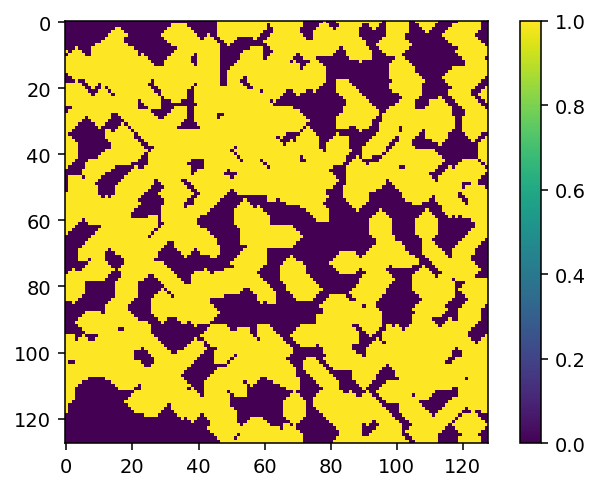

In [53]:
plt.figure(dpi=140)
plt.imshow(s1_mag,interpolation='none')
plt.colorbar()

In [54]:
phi_partial = np.ones((128,128,1))
phi_partial[:,:,0] = phi_partial[:,:,0] - s1_mag

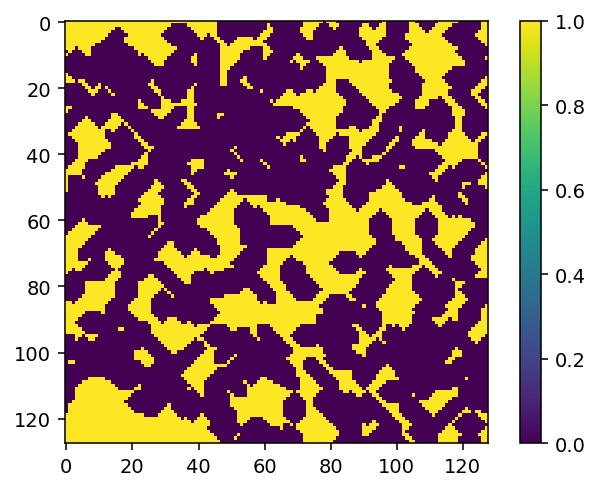

In [55]:
plt.figure(dpi=140)
plt.imshow(phi_partial,interpolation='none')
plt.colorbar()

In [56]:
s_vacuum = np.zeros((128,128,3))
phi_vacuum = np.zeros((128,128,1))

In [57]:
wr.writeHDF5_2D([phi_partial, phi_vacuum], [s1_partial, s_vacuum], 5, 'partial_morphology.hdf5','PBTTT, vacuum')

--> Marking partial_morphology.hdf5


'partial_morphology.hdf5'

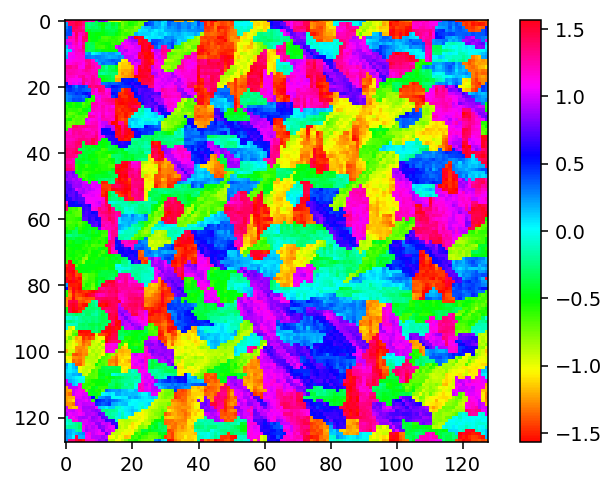

In [10]:
plt.figure(dpi=140)
plt.imshow(grow_array,cmap='hsv',interpolation='none')
plt.colorbar()

In [31]:
grow_array_l = grow_array.copy()

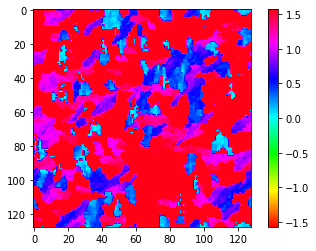

In [32]:
grow_array_l += np.pi/2
plt.imshow(grow_array_l,vmin=-np.pi/2,vmax=np.pi/2,cmap='hsv')
plt.colorbar()

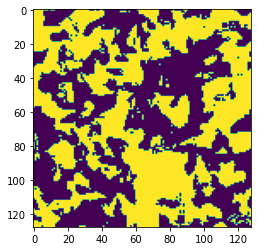

In [33]:
idx1 = grow_array_l > np.pi/2
plt.imshow(idx1)

In [34]:
grow_array_l[idx1] %= -np.pi/2

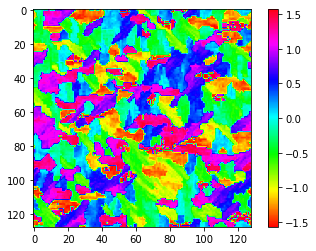

In [35]:
plt.imshow(grow_array_l,vmin=-np.pi/2,vmax=np.pi/2,cmap='hsv')
plt.colorbar()

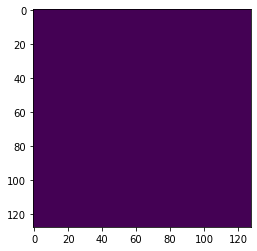

In [37]:
plt.imshow(grow_array_l < -np.pi/2)

In [38]:
s_l = np.zeros((128,128,3))
s_l[:,:,0] = np.cos(grow_array_l)
s_l[:,:,1] = np.sin(grow_array_l)

In [18]:
s1 = np.zeros((128,128,3))

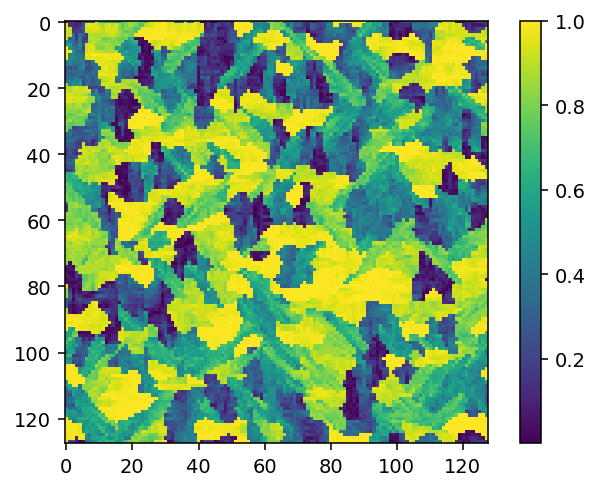

In [11]:
plt.figure(dpi=140)
plt.imshow(np.cos(grow_array),interpolation='none')
plt.colorbar()

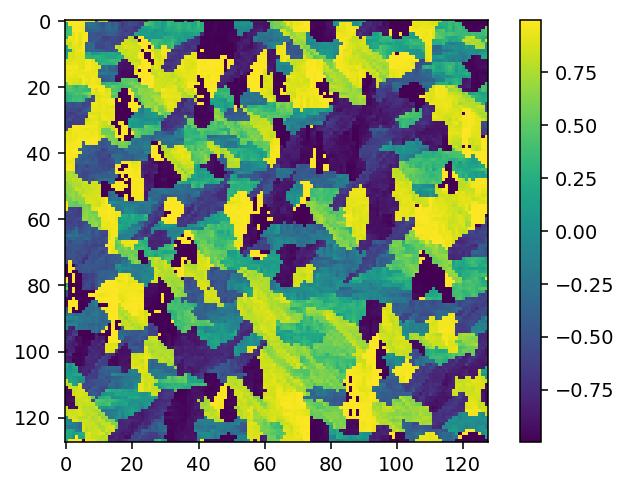

In [12]:
plt.figure(dpi=140)
plt.imshow(np.sin(grow_array),interpolation='none')
plt.colorbar()

In [19]:
s1[:,:,0] = np.cos(grow_array)
s1[:,:,1] = np.sin(grow_array)

In [20]:
s2 = np.zeros((128,128,3))

In [22]:
phi1 = np.ones((128,128,1))
phi2 = np.zeros((128,128,1))

In [1]:
from writer_class import writer
wr = writer()

In [23]:
wr.writeHDF5_2D([phi1, phi2], [s1, s2], 5, 'test_morphology.hdf5','PBTTT, vacuum')

--> Marking test_morphology.hdf5


'test_morphology.hdf5'

In [24]:
wr.write_config('config.txt',270.0,300.0,1.0,0.0,360.0,360.0,4,128,128,1,5.0)

In [25]:
material_dict = {'Material0':'PBTTT_uniaxial.txt','Material1':'vacuum'}

energy_dict = {'Energy':0,'DeltaPerp':1,'BetaPerp':2,'DeltaPara':3,'BetaPara':4}

In [26]:
material_dict['Material0']

'PBTTT_uniaxial.txt'

In [27]:
energy_dict['Energy']

0

In [ ]:
s_list = [s1, s_l, s_alkyl,s_vacuum]
phi_list = [phi_1, phi_l, phi_alkyl, phi_vacuum]

In [ ]:
wr.writeHDF5_2D(s_list, phi_list, 5, 'test_morphology.hdf5','PBTTT, vacuum')

In [1]:
import subprocess
import shlex

In [4]:
pwd

'C:\\Users\\pjd1\\NIST\\library\\STEMtranslator'

In [9]:
import os

In [12]:

for i in [5,6,7,8]:
    os.mkdir(f"C:\\Users\\pjd1\\NIST\\library\\STEMtranslator\\test{i}")

In [ ]:
mkdir test4

In [5]:
subprocess.run(["mkdir","C:\\Users\\pjd1\\NIST\\library\\STEMtranslator\\test"])

FileNotFoundError: [WinError 2] The system cannot find the file specified

In [2]:
mkdir_command = 'mkdir test'
subprocess.run(shlex.split(mkdir_command))

FileNotFoundError: [WinError 2] The system cannot find the file specified

## Translator class for translating STEM data

In [51]:
from translator_class import translator

In [52]:
tl = translator()

In [53]:
import glob
flist = glob.glob('*.npy')

In [55]:
ss, q, chi, data = tl.load_npy(flist[0])

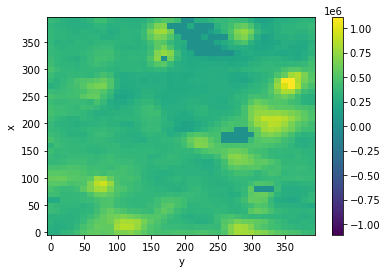

In [68]:
data_sub = tl.subtract_powerlaw(q,data)
data_dark = tl.dark_field(ss,data_sub)
data_dark.plot(cmap='viridis')

### Find and fit arbitrary number of gaussian peaks to data

In [69]:
peaks, num_peaks, data_1d = tl.peak_finder(q, chi, data_sub)

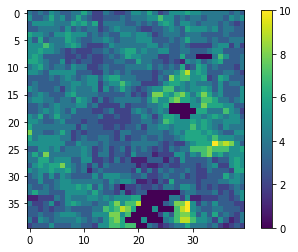

In [72]:
tl.implot(num_peaks)
plt.colorbar()
plt.show()

In [78]:
opt_params = tl.fit_peaks(chi,data_1d,peaks,num_peaks)

In [91]:
peak_int, peak_pos, peak_fwhm, bckgrnd = tl.list_to_array(opt_params,num_peaks)

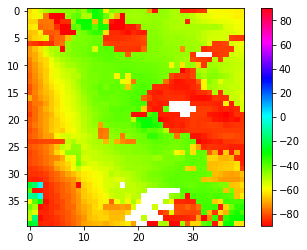

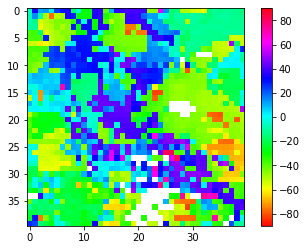

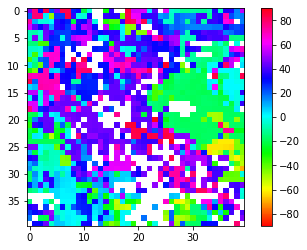

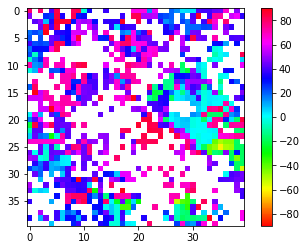

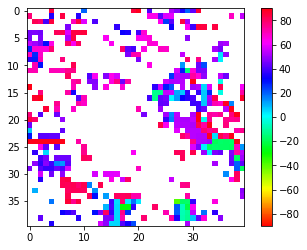

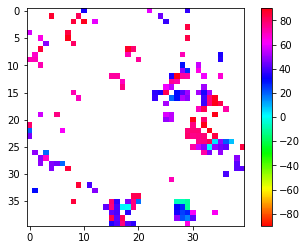

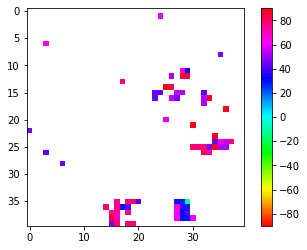

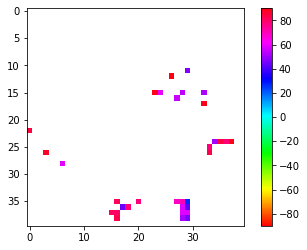

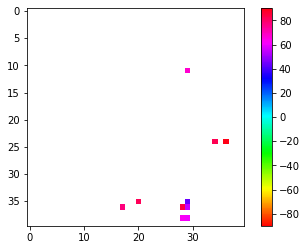

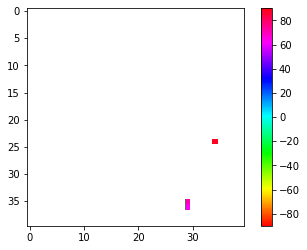

In [428]:
for i in range(peak_pos.shape[-1]):
    plt.figure()
    tl.implot(peak_pos[:,i],cmap='hsv',vmin=-90,vmax=90)
    plt.colorbar()
    plt.show()

## Fiber growth class

In [122]:
from fibergrowth_class import fibergrowth

In [123]:
fg = fibergrowth()

### Fibers with orthorhombic dielectric function

In [429]:
fiberspace, alignmentspace = fg.grow_fibers(100,0,0.1,0.1,5,5,500,fiber_width_sigma=1)

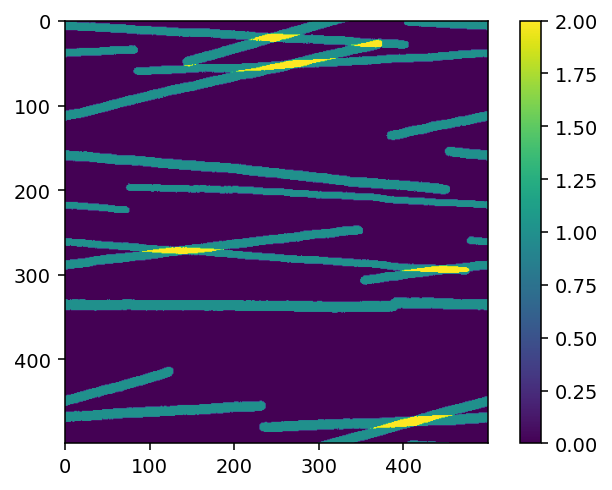

In [404]:
plt.figure(dpi=140)
plt.imshow(fibers)
plt.colorbar()

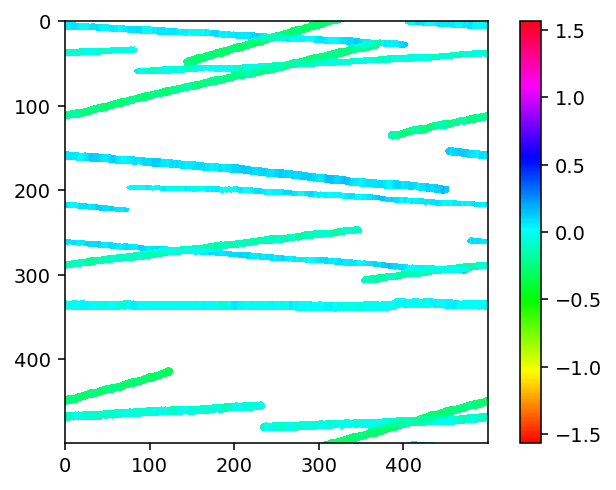

In [405]:
plt.figure(dpi=140)
plt.imshow(orientation,cmap='hsv',vmin=-np.pi/2,vmax=np.pi/2)
plt.colorbar()

### Fibers with helically varying dielectric function

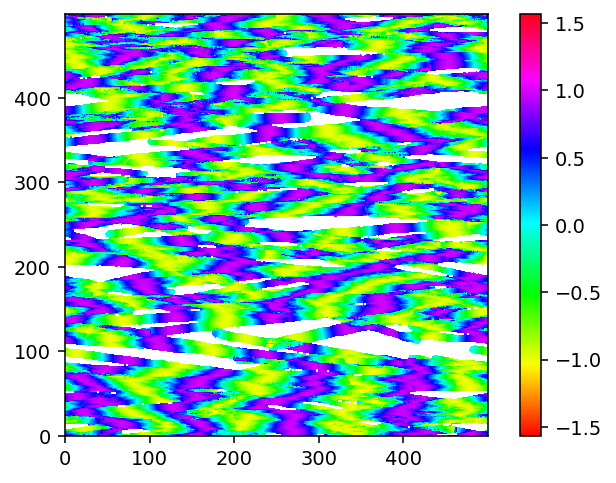

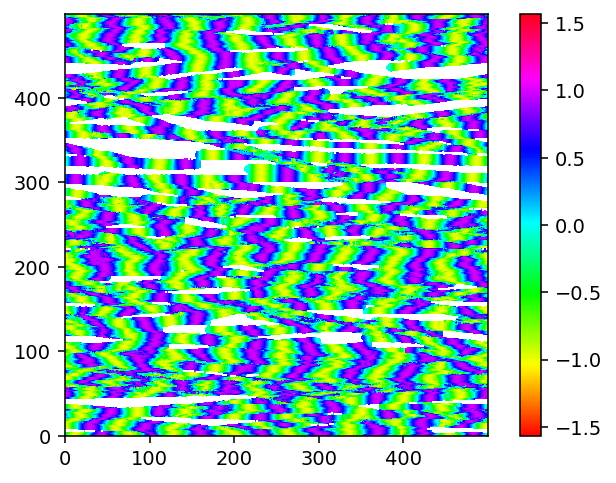

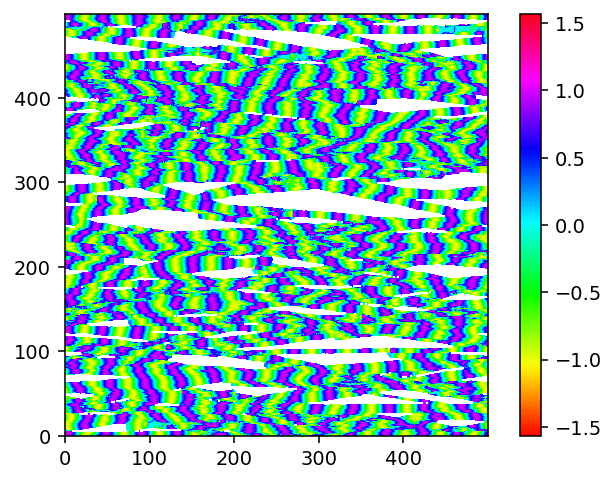

In [415]:
for scale in [0.05,0.1,0.15]:
    fibers2, tan, norm, binorm = fg.grow_helicalfibers(100,0,0.1,0.1,5,5,500,scale,fiber_width_sigma=1,fiber_length=500)
    plt.figure(dpi=140)
    plt.imshow(norm[:,:,1],cmap='hsv',vmin=-np.pi/2,vmax=np.pi/2,origin='lower')
    plt.colorbar()
    plt.show()

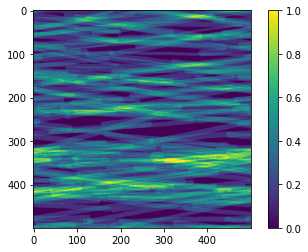

In [425]:
plt.imshow(fibers2/np.mean(fibers2)*0.3,vmax=1)
plt.colorbar()